# SIQR Modelling

### In order to better understand the Covid-19 data from the onset of the pandemic, I tried to calculate the associated parameters that explains the evolution of pandemic.
### For eg, Rate of Transmission (beta),Effective Reproduction rate (Reff) etc.

### For calculation parameters discused above I have used equations from the research paper [Modelling and analysis of COVID-19 epidemic in India](https://www.sciencedirect.com/science/article/pii/S2666449620300311) to fit the Covid-19 data which will give me **beta**,**(alpha+eta)**, **Reff** for a particular interval.Please go through the above research paper to better understand the below code. Comments have also been added for the clarity.
### Below equation has been used to fit the data,


<img src='eq9.png' width=500>

### which is in form 

<img src='eq9form.png' width=300>


### here A=(alpha + eta)*(Inot) , B= beta- (alpha + eta) and t is the number of days from the starting point of your model.

### Importing libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

C:\Users\Saurav Kumar\Anaconda3\envs\virtual_workspace\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Saurav Kumar\Anaconda3\envs\virtual_workspace\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Saurav Kumar\Anaconda3\envs\virtual_workspace\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Saurav Kumar\Anaconda3\envs\virtual_workspace\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Saurav Kumar\Anacon

### Getting the data and cleaning it.

In [4]:
df=pd.read_csv(r'C:\Users\Saurav Kumar\projects\covid\covid.csv')

remove_ind=df[df['state']=='TT']['state'].index

df.drop(remove_ind,inplace=True)

grouped_dates=df.groupby('dates').sum().reset_index()

grouped_dates.drop('population',axis=1,inplace=True )

grouped_dates.drop(559,axis=0,inplace=True )

In [5]:

#Curve_fit is imported from scipy module

from scipy.optimize import curve_fit

'''Eq 9 from the research paper'''

# Defining a equation in below function which is derived in the research paper that will fit in the scraped data to obtain pandemic parameters.

def optimize(t,a,b):
    return (a/b)*(np.exp(b*t)-1)


# Taking the total reported confirmed Cases from 15th March,2021 to 15th May,2021 when India experiencing second wave peak in between.

y=grouped_dates[(grouped_dates.dates >'2021-03-15') & ((grouped_dates.dates <'2021-05-16'))]['confirmed'].cumsum().values

# x (input) as number of days from which we are calculating.

x=np.array(range(1,len(y)+1))


# Fitting the above data points (x,y) on fucntion described in OPTIMIZE while also providing inital guess value for both the fitting parameters

popt,pcov=curve_fit(optimize,x,y,p0=(0.22,0.08))

# Extracting fitting parameters A & B below 

a,b=popt

print(f'a : {a}, b : {b}')

a : 52063.60124819972, b : 0.04132911943281094


### In the above cell , we calculated the fitting parameters A & B using which we will obtain the rate of transmission (beta) and Effective Reproduction number (Reff).
### Please see research paper for more details.

### **Note** : While fitting the equation to the data points, I have provided initial guess for both the parameters in the **curve_fit** func of ***scipy*** otherwise the predicted value would diverge drastically.

### I have defined  (alpha + eta) as **alpha** here which is **A/Inot**

In [6]:
# Inot will be the total reported confirmed cases on the first day of time interval for which we are calculating.

alpha=a/y[0]

# Beta which is rate of transmission is given by **b+alpha**

beta=alpha+b
    
print('Rate of Transmission for period between 15th March to 15th May is : ',beta)

Rate of Transmission for period between 15th March to 15th May is :  1.8447723023695153


In [7]:
# Reff is the effective reproduction number which come here as above 1 which means covid19 is still spreading.

reff=beta/alpha
print('Effective Reproduction Number for this period is : ', reff)

Effective Reproduction Number for this period is :  1.0229167848612293


### Visualisation of the observed data along with the values obtained after passing the just calculated fitting parameters in the equation for the same period will help us analyse how good is our curve fit. 


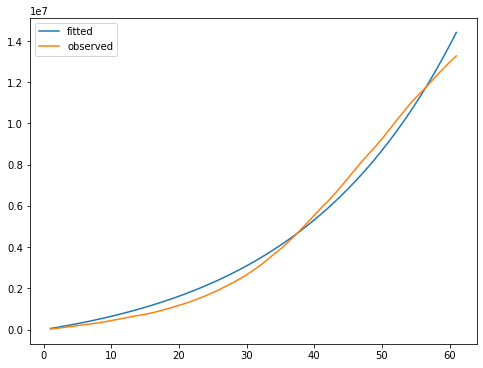

In [8]:
# Calculating the y_values from our fitted equation.
y_opt=optimize(x,a,b)

fig,ax=plt.subplots(figsize=(8,6))

#plotting observed and obtained y_values(confirmed cases)
fitted = sns.lineplot(x=x,y=y_opt)
observed = sns.lineplot(x=x,y=y)

ax.legend(['fitted','observed'])

### You can see it's a good fit.

### Calculating R2 score using scikit.metrics module. R2 score helps us understand how well we have fitted the equation to our data.


In [9]:
from sklearn.metrics import r2_score

print('R2 Score : ',r2_score(y_opt,y))

R2 Score :  0.9898514224232584


### In the above cells, we calculated rate of transmission for a 2 month interval i.e. from March,2021 to May,2021. We can also obtain these parameters for a shorter period
### for eg. **for a period between 10th April to 10th May** or **for a period of 8 or 10 days**.

### Below I have calculated the fitting parameters for a period between 15th April to 5th May. Lets see the transmission rate of this period.


In [10]:
from scipy.optimize import curve_fit

'''Eq 9 from the research paper'''

def optimize(t,a,b):
    first=a/b
    second=(np.exp((b)*t)-1)
    return first*second

# Period between 15th April,2021 and 05th May,2021 has been selected below.

y1=grouped_dates[(grouped_dates.dates >'2021-04-15') & (grouped_dates.dates <'2021-05-05')]['confirmed'].cumsum().values

'''number of days from 15th March,2021'''

x1=np.array(range(1,len(y1)+1))

'''Fitting the above data points on fucntion described in OPTIMIZE'''

popt,pcov=curve_fit(optimize,x1,y1,p0=(0.22,0.08))

'''Fitting Parameters A and B'''

a1,b1=popt

print(f'a : {a1}, b : {b1}')

a : 259885.99953290314, b : 0.027092994182226094


In [11]:
# Inot will be the total reported confirmed cases on the first day of time interval for which we are calculating.

alpha1=a1/y1[0]

# Beta which is rate of transmission is given by "b+alpha"

beta1=alpha1+b1

print('Rate of Transmission for period between 15th April to 5th May is : ',beta1)

Rate of Transmission for period between 15th April to 5th May is :  1.13770743137893


In [12]:
reff1=beta1/alpha1
print('Effective Reproduction rate for this period is',reff1)

Effective Reproduction rate for this period is 1.0243945993090198


### Visualizing the observed and fitted data

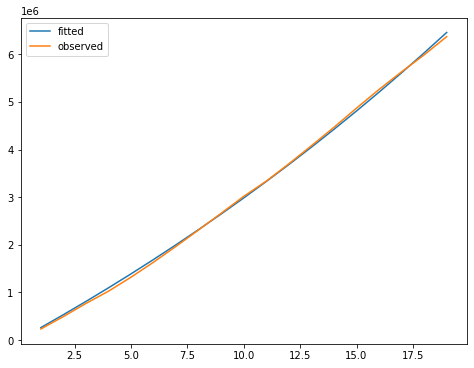

In [13]:
# Calculating the y_values from our fitted equation.

y_opt1=optimize(x1,a1,b1)

fig,ax=plt.subplots(figsize=(8,6))

#plotting observed and obtained y_values(confirmed cases)
fitted1 = sns.lineplot(x=x1,y=y_opt1)
observed1 = sns.lineplot(x=x1,y=y1)

ax.legend(['fitted','observed'])

In [14]:
from sklearn.metrics import r2_score

print('R2 Score : ',r2_score(optimize(x1,a1,b1),y1))

R2 Score :  0.999414600885281


### Here, we have better R2 score than the pervious one where period is much larger. Like this, we can calculate **beta** and **Reff** for any period for which we have the data points. 

# End of the Notebook